# Auto-Correction Exercise

This exercise will guide you through building an auto-correct system in Python. Follow the instructions in each step to complete the implementation.

## Step 1: Import Libraries

Import the necessary libraries

In [4]:
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import nltk

## Step 2: Load Data

Load a trusted text corpus to build the auto-correct system.

In [5]:
import gzip

with gzip.open('/content/meta_AMAZON_FASHION.json.gz', 'rt', encoding='utf-8') as f:
    file_content = f.read()

print(file_content[:4000])


{"title": "Slime Time Fall Fest [With CDROM and Collector Cards and Neutron Balls, Incredi-Ball and Glow Stick Necklace, Paper Fram", "brand": "Group Publishing (CO)", "feature": ["Product Dimensions:\n                    \n8.7 x 3.6 x 11.4 inches", "Shipping Weight:\n                    \n2.4 pounds"], "rank": "13,052,976inClothing,Shoesamp;Jewelry(", "date": "8.70 inches", "asin": "0764443682", "imageURL": ["https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL._US40_.jpg"], "imageURLHighRes": ["https://images-na.ssl-images-amazon.com/images/I/51bSrINiWpL.jpg"]}
{"title": "XCC Qi promise new spider snake preparing men's accessories alloy fittings magnet buckle bracelet jewelry", "rank": "11,654,581inClothing,Shoesamp;Jewelry(", "date": "5 star", "asin": "1291691480", "imageURL": ["https://images-na.ssl-images-amazon.com/images/I/41BCH7-4vHL._US40_.jpg", "https://images-na.ssl-images-amazon.com/images/I/41FpbB--SoL._US40_.jpg", "https://images-na.ssl-images-amazon.com/images/I/

## Step 3: Data Processing

Tokenize the text and convert all characters to lowercase to clean the data.

In [9]:
def process_data(lines):
    words = []
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)
    return words
word_l = process_data(file_content.splitlines())
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['title', 'slime', 'time', 'fall', 'fest', 'with', 'cdrom', 'and', 'collector', 'cards']
There are 818240 unique words in the vocabulary.



## Step 4: Architecture Overview

This auto-correct architecture has four main components:

1. **Filtering Mispells**: Check if a word is in the vocabulary.
2. **Word Suggestion Mechanism**: Suggest candidate words based on various edit operations.
3. **Probability Distribution Mechanism**: Calculate the probability of each candidate word.
4. **Replace Mispells**: Replace the misspelled word with the most probable suggestion.

Implement each part step-by-step in the cells below.


### Step 4.1: Filtering Mispells

Write a function to identify words not present in the vocabulary.

In [12]:
def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

find_wrong_word('he is goor work', vocab)

['goor']

### Step 4.2: Word Suggestion Mechanism

Implement functions to suggest words by deleting, switching, replacing, or inserting characters.

In [13]:
def delete_letter(word, verbose=False):
    delete_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")
    return delete_l

delete_word_l = delete_letter(word="cans", verbose=True)


input word : cans 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [14]:
def switch_letter(word, verbose=False):
    switch_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) > 2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")
    return switch_l

switch_word_l = switch_letter(word="yess", verbose=True)

Input word = yess 
split_l = [('', 'yess'), ('y', 'ess'), ('ye', 'ss'), ('yes', 's')] 
switch_l = ['eyss', 'yses', 'yess']


In [15]:
def replace_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l)
        elif len(s[1]) > 1:
            for l in letters:
                if l != s[1][0]:
                    replace_l.append(s[0] + l + s[1][1:])
    replace_set = set(replace_l)
    replace_l = sorted(list(replace_set))
    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l = {replace_l}")
    return replace_l

replace_l = replace_letter(word='cant', verbose=True)

Input word = cant 
split_l = [('', 'cant'), ('c', 'ant'), ('ca', 'nt'), ('can', 't')] 
replace_l = ['aant', 'bant', 'caat', 'cabt', 'cact', 'cadt', 'caet', 'caft', 'cagt', 'caht', 'cait', 'cajt', 'cakt', 'calt', 'camt', 'cana', 'canb', 'canc', 'cand', 'cane', 'canf', 'cang', 'canh', 'cani', 'canj', 'cank', 'canl', 'canm', 'cann', 'cano', 'canp', 'canq', 'canr', 'cans', 'canu', 'canv', 'canw', 'canx', 'cany', 'canz', 'caot', 'capt', 'caqt', 'cart', 'cast', 'catt', 'caut', 'cavt', 'cawt', 'caxt', 'cayt', 'cazt', 'cbnt', 'ccnt', 'cdnt', 'cent', 'cfnt', 'cgnt', 'chnt', 'cint', 'cjnt', 'cknt', 'clnt', 'cmnt', 'cnnt', 'cont', 'cpnt', 'cqnt', 'crnt', 'csnt', 'ctnt', 'cunt', 'cvnt', 'cwnt', 'cxnt', 'cynt', 'cznt', 'dant', 'eant', 'fant', 'gant', 'hant', 'iant', 'jant', 'kant', 'lant', 'mant', 'nant', 'oant', 'pant', 'qant', 'rant', 'sant', 'tant', 'uant', 'vant', 'want', 'xant', 'yant', 'zant']


In [16]:
def insert_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0] + l + s[1])
    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")
    return insert_l

insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


**Combining Functions for Word Suggestions**

Combine the functions to edit one or two characters in a word.

In [17]:
def edit_one_letter(word, allow_switches=True):
    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)
    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l
    edit_one_set = set(ans)
    return edit_one_set

In [18]:
tmp_word = "ls"
tmp_edit_one_set = edit_one_letter(tmp_word)
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word : ls 
edit_one_l 
['als', 'as', 'bls', 'bs', 'cls', 'cs', 'dls', 'ds', 'els', 'es', 'fls', 'fs', 'gls', 'gs', 'hls', 'hs', 'ils', 'is', 'jls', 'js', 'kls', 'ks', 'l', 'la', 'las', 'lb', 'lbs', 'lc', 'lcs', 'ld', 'lds', 'le', 'les', 'lf', 'lfs', 'lg', 'lgs', 'lh', 'lhs', 'li', 'lis', 'lj', 'ljs', 'lk', 'lks', 'll', 'lls', 'lm', 'lms', 'ln', 'lns', 'lo', 'los', 'lp', 'lps', 'lq', 'lqs', 'lr', 'lrs', 'lsa', 'lsb', 'lsc', 'lsd', 'lse', 'lsf', 'lsg', 'lsh', 'lsi', 'lsj', 'lsk', 'lsl', 'lsm', 'lsn', 'lso', 'lsp', 'lsq', 'lsr', 'lss', 'lst', 'lsu', 'lsv', 'lsw', 'lsx', 'lsy', 'lsz', 'lt', 'lts', 'lu', 'lus', 'lv', 'lvs', 'lw', 'lws', 'lx', 'lxs', 'ly', 'lys', 'lz', 'lzs', 'mls', 'ms', 'nls', 'ns', 'ols', 'os', 'pls', 'ps', 'qls', 'qs', 'rls', 'rs', 's', 'sl', 'sls', 'ss', 'tls', 'ts', 'uls', 'us', 'vls', 'vs', 'wls', 'ws', 'xls', 'xs', 'yls', 'ys', 'zls', 'zs']

Number of outputs from edit_one_letter('at') is 129


In [19]:
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''

    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))

    edit_two_set = set(ans)

    return edit_two_set

In [20]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


### Step 4.3: Probability Distribution

Calculate the frequency of each word in the corpus and compute the probability distribution.

In [21]:
def get_count(word_l):
    word_count_dict = Counter(word_l)
    return word_count_dict

word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'iss' is {word_count_dict.get('iss',0)}")

There are 818240 key values pairs
The count for the word 'iss' is 0


In [22]:
def get_probs(word_count_dict):
    probs = {}
    total = sum(word_count_dict.values())
    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word] / total
    return probs

probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")
print(f"P('is') is {probs['is']:.4f}")

Length of probs is 818240
P('is') is 0.0007


<Axes: xlabel='word'>

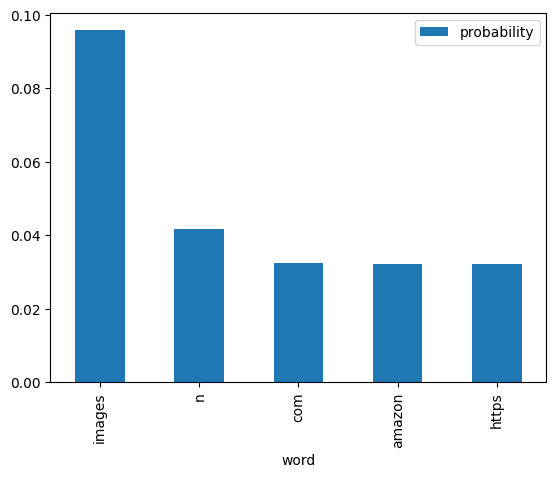

In [23]:
prob_df = pd.DataFrame({'word': probs.keys(), 'probability': probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

prob_df.head().plot.bar(x='word', y='probability')

### Step 4.4: Replace Misspells with Correction

Write a function to replace misspelled words with the most probable corrections.

In [24]:
def get_corrections(word, probs, vocab, n=2, verbose=False):
    suggestions = []
    n_best = []

    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)

    best_words = sorted({s: probs[s] for s in suggestions}.items(), key=lambda x: x[1], reverse=True)
    n_best = best_words

    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)
    return n_best

def get_correct_word(word, vocab, probs, n):
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
    if len(corrections) == 0:
        return word

    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

get_correct_word('annd', vocab, probs, 100)

'and'

### Step 5: Final Auto-Correction Function

Combine all parts into a final function that corrects sentences.

In [25]:
def autocorrect(sentence, vocab, probs):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    correct_words = []
    for word in sentence.strip().lower().split(" "):
        if word in wrong_words:
            correct_word = get_correct_word(word, vocab, probs, 15)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())

### Step 6: Demo

Apply your work to a sentence

In [26]:
autocorrect("nott", vocab, probs)


Input sentence :  nott
Wrong words :  ['nott']
Output Sentence :  Not


In [27]:
autocorrect("yoi", vocab, probs)


Input sentence :  yoi
Wrong words :  []
Output Sentence :  Yoi


In [28]:
autocorrect("life is a eat and lofe is a good", vocab, probs)


Input sentence :  life is a eat and lofe is a good
Wrong words :  ['lofe']
Output Sentence :  Life is a eat and love is a good
